<a href="https://colab.research.google.com/github/dlarsson2000/ML4BiotechProject/blob/main/CB206V_Group_6_Project_Drug_repurposing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 365.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.8 MB/s eta 0:00:00
   

In [2]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/grk2_fp_data.csv')
df_X = dataset.drop(columns=['chembl_id', 'canonical_smiles', 'bioactivity'])
model = setup(data = df_X, target = 'pIC50', train_size=0.8, fold=5)

,Description,Value
0,Session id,8501
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(312, 1025)"
4,Transformed data shape,"(312, 1025)"
5,Transformed train set shape,"(249, 1025)"
6,Transformed test set shape,"(63, 1025)"
7,Numeric features,1024
8,Preprocess,True
9,Imputation type,simple


In [4]:
br = create_model('br', return_train_score=True, fold=5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
print(br)
tuned_br = tune_model(br, n_iter = 50, optimize = 'mae')

BayesianRidge()


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5790,0.5963,0.7722,0.5766,0.1136,0.0992
1,0.6761,0.7745,0.8801,0.5708,0.1357,0.1258
2,0.5163,0.5761,0.7590,0.6700,0.1147,0.0946
3,0.5819,0.5923,0.7696,0.6390,0.1108,0.0982
4,0.5699,0.5651,0.7518,0.5779,0.1078,0.0959
Mean,0.5846,0.6209,0.7865,0.6069,0.1165,0.1027
Std,0.0516,0.0776,0.0473,0.0402,0.0099,0.0116


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


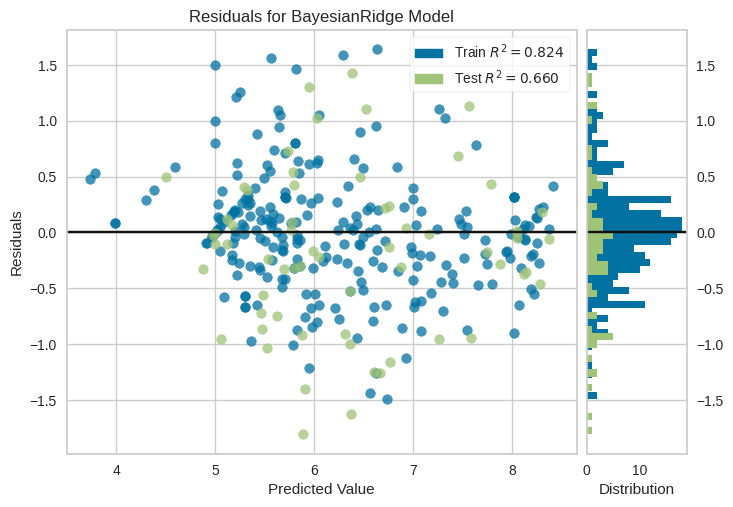

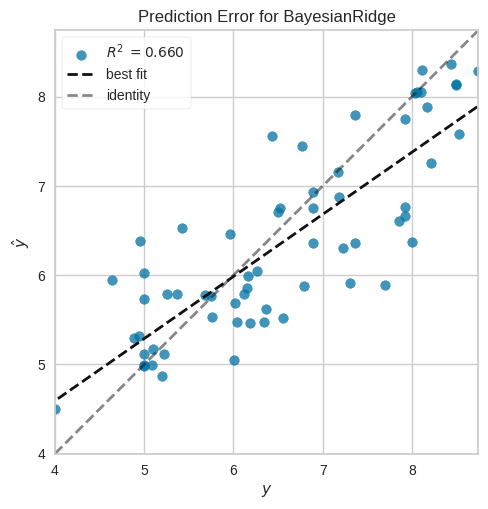

In [8]:


plot_model(tuned_br, 'residuals')

plot_model(tuned_br, 'error')


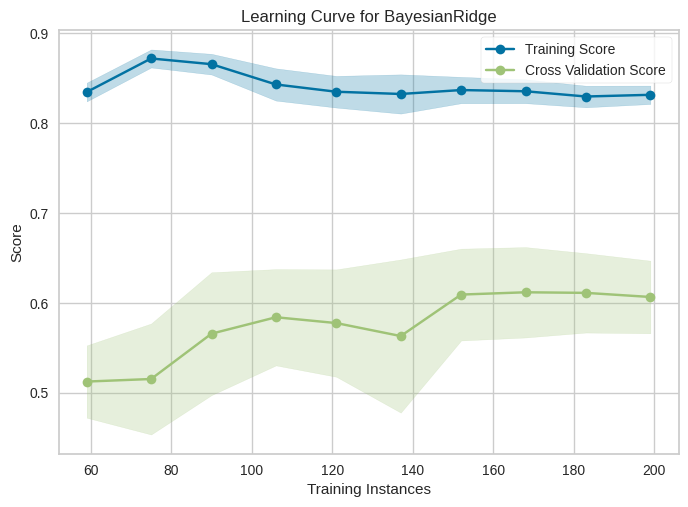

In [9]:
plot_model(tuned_br, plot = 'learning')

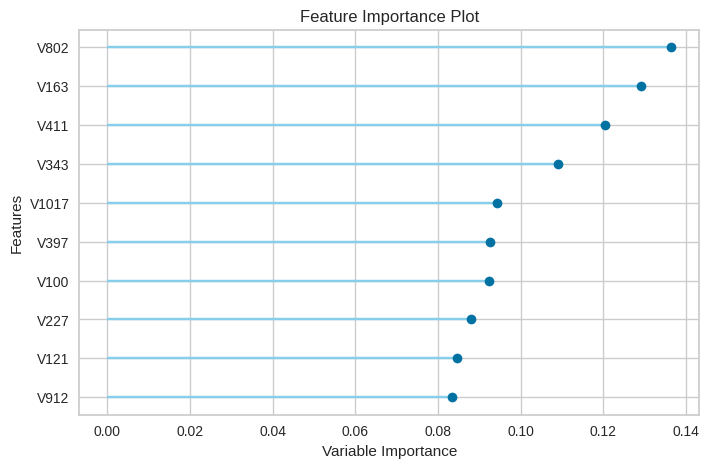

In [10]:
plot_model(tuned_br, 'feature')

In [11]:
prediction_holdout = predict_model(tuned_br)

prediction_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.5480,0.5136,0.7166,0.6598,0.0971,0.0853


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,pIC50,prediction_label
208,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,8.522879,7.582269
279,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,6.795880,5.879792
113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.552842,5.522601
38,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,5.000000,5.118063
264,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.267606,6.045254


In [12]:
# read prediction data from file
dataset2 = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/drug_phaseIV_fp_data.csv')
dataset2.head(5)


,chembl_id,canonical_smiles,max_phase,name,V5,V6,V7,V8,V9,V10,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,CHEMBL3833408,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,4,MAGALDRATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL807,CC12CC3CC(C)(C1)CC(N)(C3)C2,4,MEMANTINE,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,CHEMBL30,CN/C(=N\CCSCc1nc[nH]c1C)NC#N,4,CIMETIDINE,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1201354,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,4,TRIDIHEXETHYL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL453,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,4,SULFISOXAZOLE,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_new_X = dataset2.drop(columns=['name','chembl_id','canonical_smiles','max_phase'])
df_new_X.head(5)

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#add all data to the final model
finalize_model(tuned_br)

# predict on new data
prediction_newdata = predict_model(tuned_br, data = df_new_X)
prediction_newdata.head()


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,prediction_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.904614
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.880478
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.583560
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.802438
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.077067


In [18]:
plot_model(tuned_br, 'parameter')

,Parameters
alpha_1,0.01
alpha_2,0.1
alpha_init,None
compute_score,True
copy_X,True
fit_intercept,True
lambda_1,0.3
lambda_2,1e-06
lambda_init,None
max_iter,None


In [15]:
#Visualize the data

#Take the names from the df_new
names = dataset2['name'].values
print(names[:5])
col_names = names.reshape(-1, 1) #making the row into a column
#print(col_names[:5])
predictions = prediction_newdata.prediction_label.values
print(predictions[:5])
col_predictions = predictions.reshape(-1, 1) #making the row into a column
#Vertically stack new arrays
pred_names = np.hstack((col_names, col_predictions))
print(pred_names[:5])

['MAGALDRATE' 'MEMANTINE' 'CIMETIDINE' 'TRIDIHEXETHYL' 'SULFISOXAZOLE']
[4.90461395 4.88047821 4.58355975 4.8024383  5.07706684]
[['MAGALDRATE' 4.90461395230832]
 ['MEMANTINE' 4.8804782055673455]
 ['CIMETIDINE' 4.583559754415151]
 ['TRIDIHEXETHYL' 4.802438300309938]
 ['SULFISOXAZOLE' 5.077066844430158]]


In [16]:
#Select the top 20 values
# Convert the second column (values) to float for sorting
pred_names[:, 1] = pred_names[:, 1].astype(float)

# Sort the array by the second column (values) in descending order
sorted_array = pred_names[pred_names[:, 1].argsort()[::-1]]

# Select the top 20 rows (top 20 values and corresponding names)
top_20 = sorted_array[:20]

# Print the result
print(top_20)

[['BEROTRALSTAT' 6.913994252454902]
 ['LIRAGLUTIDE' 6.378234621158261]
 ['TADALAFIL' 6.312907169622684]
 ['EXENATIDE' 6.214545768652862]
 ['RIFAMPIN' 6.189102303520002]
 ['SITAGLIPTIN' 6.157648628089808]
 ['RESERPINE' 6.1435778549426345]
 ['ICATIBANT' 6.126228821662054]
 ['ESZOPICLONE' 6.079444573935689]
 ['ZOPICLONE' 6.079444573935689]
 ['PRANLUKAST' 6.075360911062901]
 ['OLODATEROL' 6.06937815250077]
 ['RIFAPENTINE' 6.055223548393959]
 ['RIFAMYCIN' 6.021494865207593]
 ['PRAMLINTIDE' 5.987460797087001]
 ['ODEVIXIBAT' 5.951905205097327]
 ['VALBENAZINE' 5.950260547503969]
 ['RIMONABANT' 5.925865683805226]
 ['DILTIAZEM' 5.8965186804365715]
 ['TENAPANOR' 5.892659215550461]]


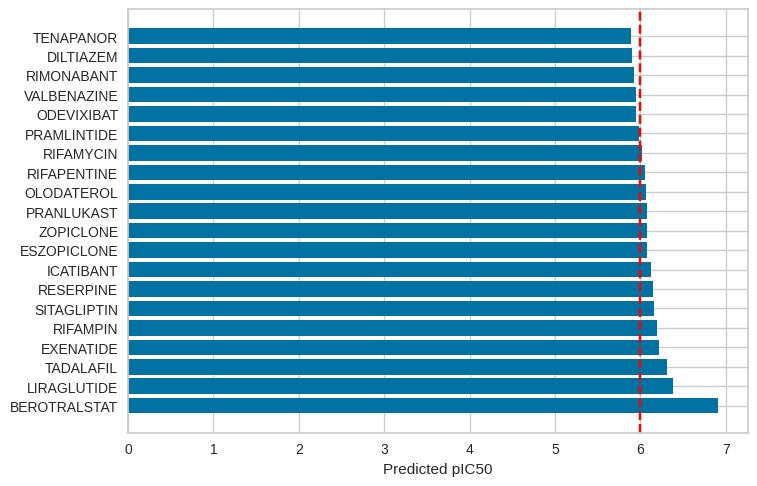

In [17]:
import matplotlib.pyplot as plt

# Select the first column for x-axis and the second column for y-axis
x_bar = top_20[:, 0]  # First column as x-axis
y_bar = top_20[:, 1]  # Second column as y-axis
threshold = 6

# Create a bar plot
plt.barh(x_bar, y_bar)

plt.xlabel('Predicted pIC50')

# Add a horizontal line for the threshold value
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')